# Name : Janhavi Sachin Phulavare

# Task 3 : Breast Cancer Classification



Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,classification_report,roc_auc_score, roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data (3).csv')

# Exploratory Data Analysis

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data.drop(['id', 'Unnamed: 32'], axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['diagnosis']=label_encoder.fit_transform(data['diagnosis'])

In [ ]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

0 : Benign


1 : Malignant

In [ ]:
data_mean = data.iloc[:, 1:11]
data_se = data.iloc[:, 11:21]
data_worst = data.iloc[:, 21:]

print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


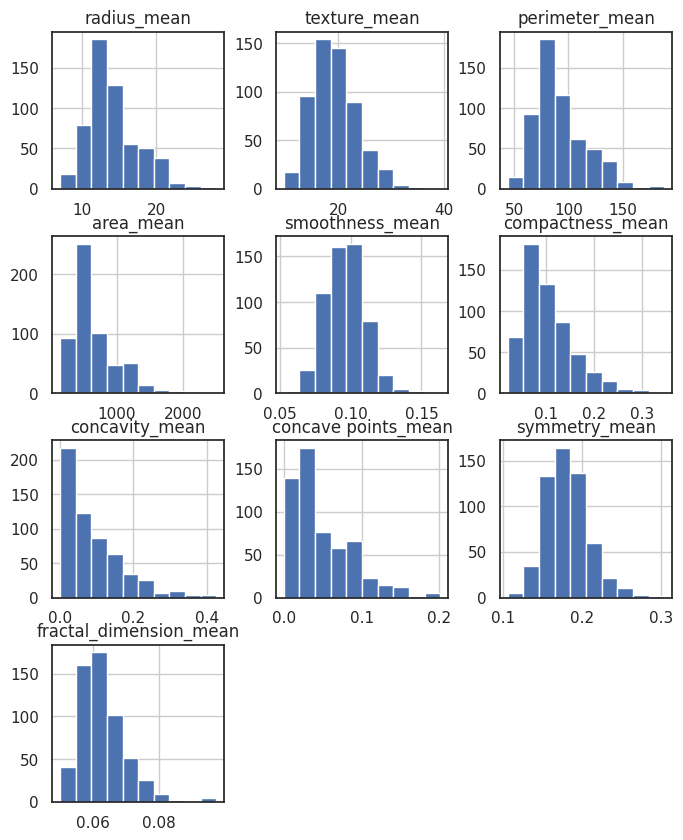

In [ ]:
fig = data_mean.hist(bins=10, figsize=(8, 10))

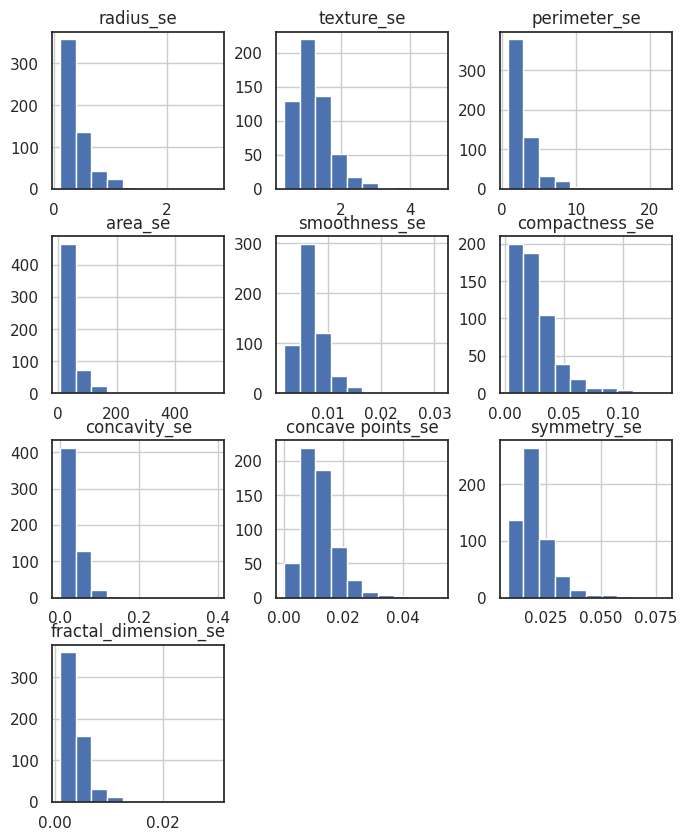

In [ ]:
fig = data_se.hist(bins=10, figsize=(8,10))

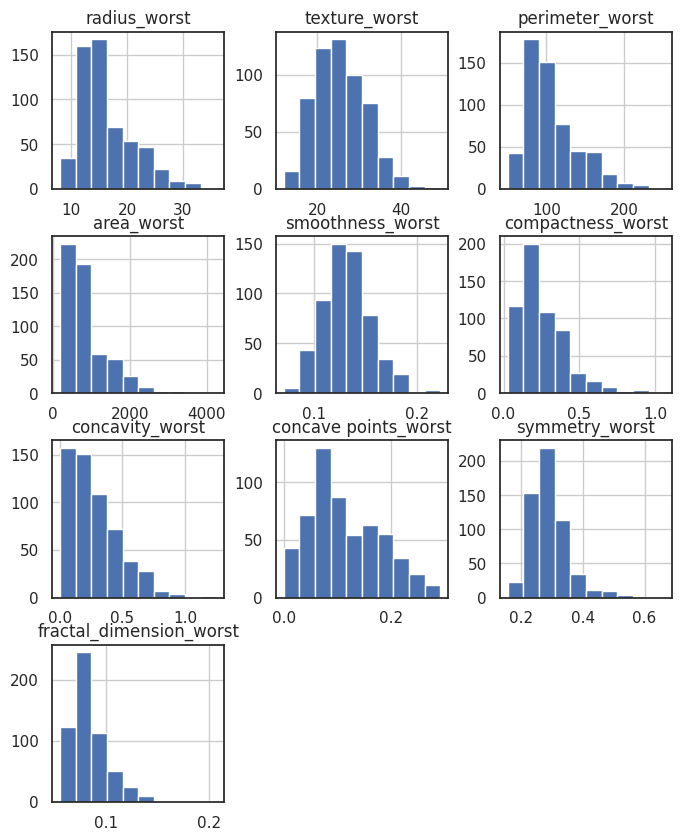

In [ ]:
fig = data_worst.hist(bins=10, figsize=(8,10))

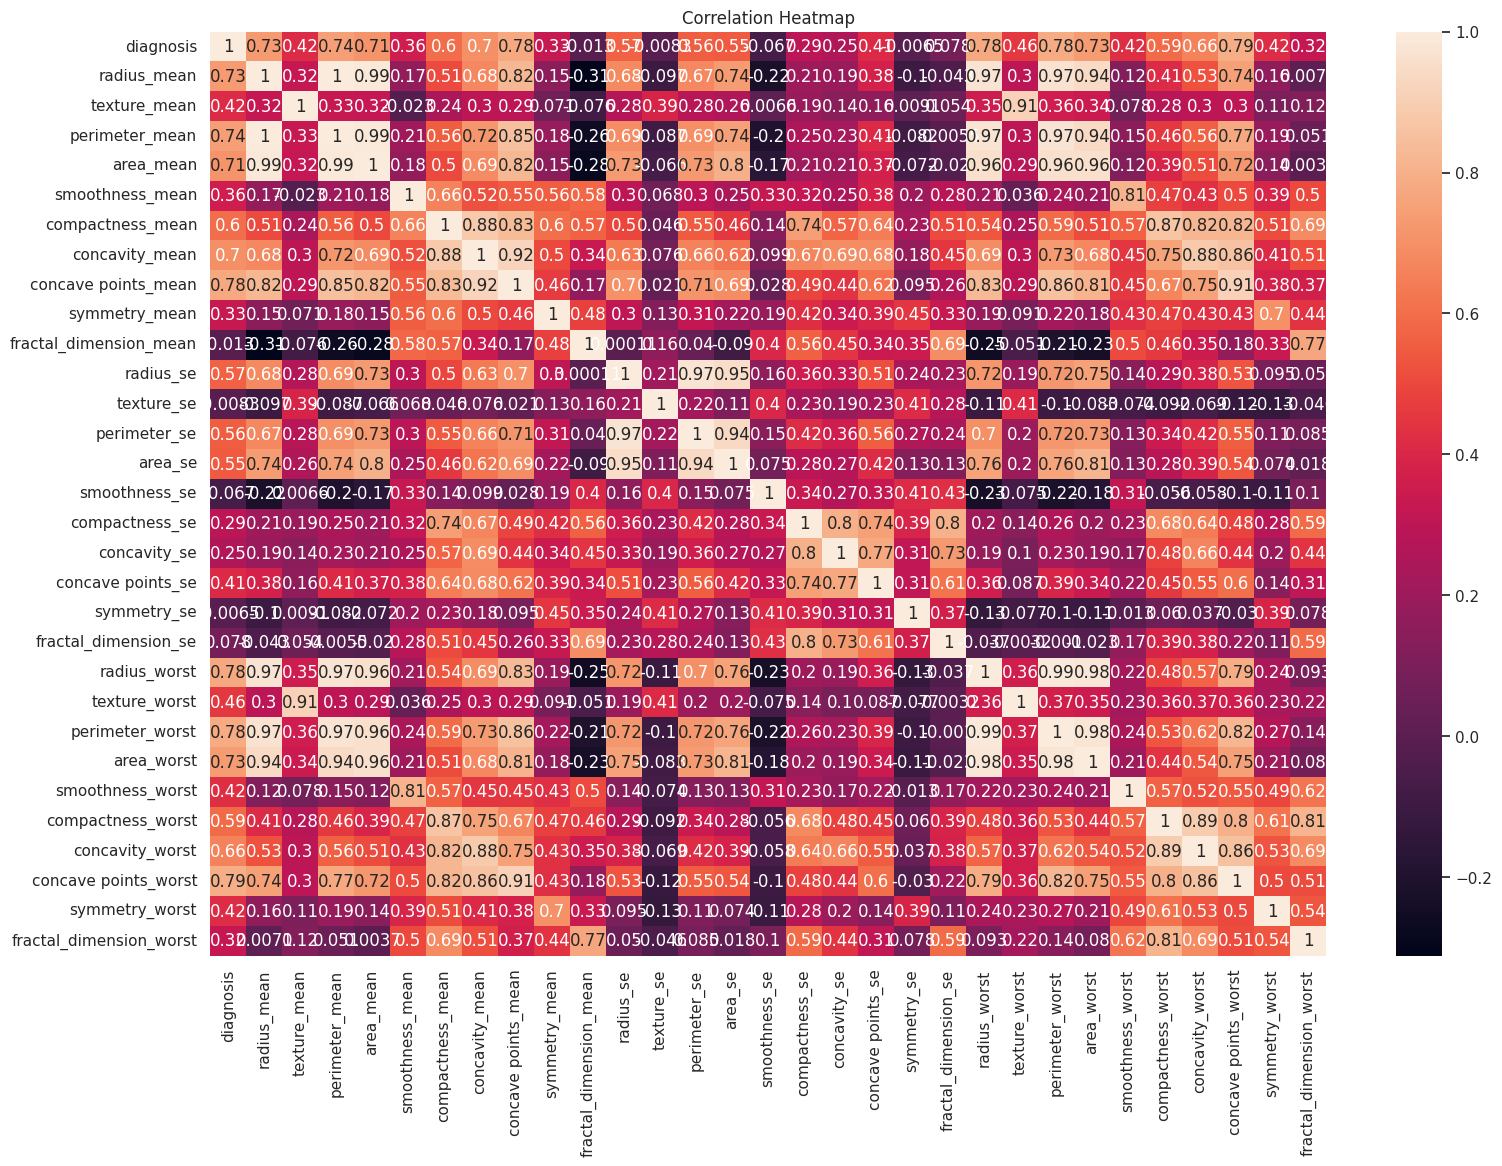

In [ ]:
correlation = data.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation, cmap='rocket', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation = data.corr()
correlation['diagnosis']

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [ ]:
high_corr = correlation[abs(correlation['diagnosis']) > 0.5]
print(high_corr.index)
print()
print("Highly correlated features:", len(high_corr))

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

Highly correlated features: 16


In [ ]:
low_corr = correlation[abs(correlation['diagnosis']) <= 0.5]
print(low_corr.index)
print()
print("Least correlated features:", len(low_corr))

Index(['texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Least correlated features: 15


Selecting important features

In [ ]:
cancer_data = data[[
    'diagnosis', 'radius_mean', 'area_mean','compactness_mean','texture_mean', 'smoothness_mean',
    'symmetry_mean','area_se', 'fractal_dimension_se','perimeter_worst', 'area_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'texture_worst', 'smoothness_worst'
]]
cancer_data.head()

,diagnosis,radius_mean,area_mean,compactness_mean,texture_mean,smoothness_mean,symmetry_mean,area_se,fractal_dimension_se,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,texture_worst,smoothness_worst
0,1,17.99,1001.0,0.27760,10.38,0.11840,0.2419,153.40,0.006193,184.60,2019.0,0.6656,0.7119,0.2654,17.33,0.1622
1,1,20.57,1326.0,0.07864,17.77,0.08474,0.1812,74.08,0.003532,158.80,1956.0,0.1866,0.2416,0.1860,23.41,0.1238
2,1,19.69,1203.0,0.15990,21.25,0.10960,0.2069,94.03,0.004571,152.50,1709.0,0.4245,0.4504,0.2430,25.53,0.1444
3,1,11.42,386.1,0.28390,20.38,0.14250,0.2597,27.23,0.009208,98.87,567.7,0.8663,0.6869,0.2575,26.50,0.2098
4,1,20.29,1297.0,0.13280,14.34,0.10030,0.1809,94.44,0.005115,152.20,1575.0,0.2050,0.4000,0.1625,16.67,0.1374


In [ ]:
cancer_data.shape

(569, 16)

In [ ]:
cancer_data.tail()

,diagnosis,radius_mean,area_mean,compactness_mean,texture_mean,smoothness_mean,symmetry_mean,area_se,fractal_dimension_se,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,texture_worst,smoothness_worst
564,1,21.56,1479.0,0.11590,22.39,0.11100,0.1726,158.70,0.004239,166.10,2027.0,0.21130,0.4107,0.2216,26.40,0.14100
565,1,20.13,1261.0,0.10340,28.25,0.09780,0.1752,99.04,0.002498,155.00,1731.0,0.19220,0.3215,0.1628,38.25,0.11660
566,1,16.60,858.1,0.10230,28.08,0.08455,0.1590,48.55,0.003892,126.70,1124.0,0.30940,0.3403,0.1418,34.12,0.11390
567,1,20.60,1265.0,0.27700,29.33,0.11780,0.2397,86.22,0.006185,184.60,1821.0,0.86810,0.9387,0.2650,39.42,0.16500
568,0,7.76,181.0,0.04362,24.54,0.05263,0.1587,19.15,0.002783,59.16,268.6,0.06444,0.0000,0.0000,30.37,0.08996


In [ ]:
cancer_data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
X = cancer_data.drop("diagnosis", axis=1)
Y = cancer_data['diagnosis']

# Spliting Data into Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 15) (114, 15) (455,) (114,)


# Model Training and Evaluation

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
rf.fit(X_train,Y_train)
rf_y_pred=rf.predict(X_test)
print("Random Forest :")
print(classification_report(Y_test,rf_y_pred))
ac_rf=accuracy_score(Y_test,rf_y_pred)
print("Accuracy Score:",ac_rf)


Random Forest :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score: 0.9736842105263158


In [ ]:
model_df = pd.DataFrame(columns=["Model Name","Accuracy Score"])

In [ ]:
new_row = {"Model Name":"Random Forest", "Accuracy Score":ac_rf}
model_df = model_df.append(new_row, ignore_index=True)

<ipython-input-123-8a4f740fe980>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(new_row, ignore_index=True)


Linear Regression

In [ ]:
  #Linear_Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)
lr_y_pred=lr.predict(X_test)
print("Logistic Regression :")
print(classification_report(Y_test,lr_y_pred))
ac_lr=accuracy_score(Y_test, lr_y_pred)
print("Accuracy Score:",ac_lr)


Logistic Regression :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

new_row = {"Model Name":"Logistic Regression", "Accuracy Score":ac_lr}
model_df = model_df.append(new_row, ignore_index=True)

<ipython-input-125-fca047730cbb>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(new_row, ignore_index=True)


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=0,criterion="entropy")
dt.fit(X_train,Y_train)
dt_y_pred=dt.predict(X_test)
print("Decision Tree:")
print(classification_report(Y_test,dt_y_pred))
ac_dt=accuracy_score(Y_test,dt_y_pred)
print("Accuracy Score:",ac_dt)

Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Accuracy Score: 0.9298245614035088


In [ ]:
new_row = {"Model Name":"Decision Tree", "Accuracy Score":ac_dt}
model_df = model_df.append(new_row, ignore_index=True)

<ipython-input-127-9a0264f07987>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(new_row, ignore_index=True)


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,Y_train)
svm_y_pred=svm.predict(X_test)
print("Support Vector Machine:")
print(classification_report(Y_test,svm_y_pred))
ac_svm=accuracy_score(Y_test,svm_y_pred)
print("Accuracy Score:",ac_svm)


Support Vector Machine:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544


In [ ]:
new_row = {"Model Name":"SVM", "Accuracy Score":ac_svm}
model_df = model_df.append(new_row, ignore_index=True)

<ipython-input-129-dff97e05e446>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(new_row, ignore_index=True)


In [ ]:
model_df.sort_values("Accuracy Score", ascending=False)

,Model Name,Accuracy Score
0,Random Forest,0.973684
1,Logistic Regression,0.964912
3,SVM,0.964912
2,Decision Tree,0.929825


# Random Forest has the highest accuracy.

Classification Report for Random forest :

In [ ]:
ClassificationReport = classification_report(Y_test,rf_y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion matrix :

<Axes: >

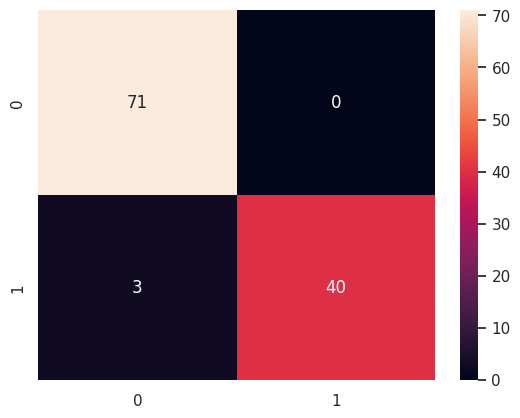

In [ ]:
cm = confusion_matrix(Y_test, rf_y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
rf_perc_score = precision_score(Y_test, rf_y_pred)
rf_rec_score= recall_score(Y_test, rf_y_pred)
rf_f1_score = f1_score(Y_test, rf_y_pred)

print('Precision: %.2f' %rf_perc_score )
print('Recall: %.2f' % rf_rec_score)
print('F1 Score: %.2f' % rf_f1_score)

Precision: 1.00
Recall: 0.93
F1 Score: 0.96


ROC _AUC Curve

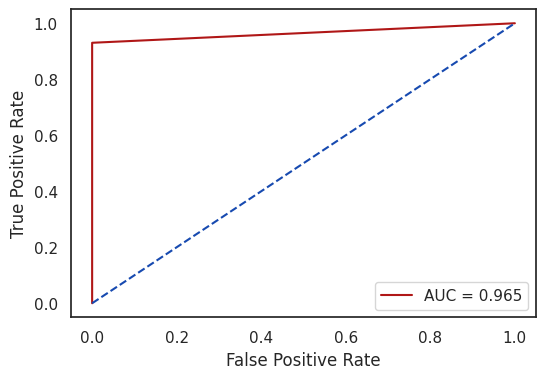

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test,rf_y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 4))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Prediction

In [ ]:
op=rf.predict([[21.56,1479.0,0.11590,22.39,0.11100,0.1726,158.70,0.004239,166.10,2027.0,0.21130,0.4107,0.2216,26.40,0.14100]])
print(op)
if (op[0] == 0):
  print('Benign')
else:
  print('Malignant')

[1]
Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
op=rf.predict([[7.76,181.0,0.04362,24.54,0.05263,0.1587,19.15,0.002783,59.16,268.6,0.06444,0.0000,0.0000,30.37,0.08996]])
print(op)
if (op[0] == 0):
  print('Benign')
else:
  print('Malignant')

[0]
Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pickle.dump(rf, open('cancermodel.pkl','wb'))

In [ ]:
rf_model = pickle.load(open('cancermodel.pkl','rb'))